<a href="https://colab.research.google.com/github/hdpark1208/StudyCode/blob/main/Algorithm/BJ/%ED%86%A0%EB%A7%88%ED%86%A0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 토마토


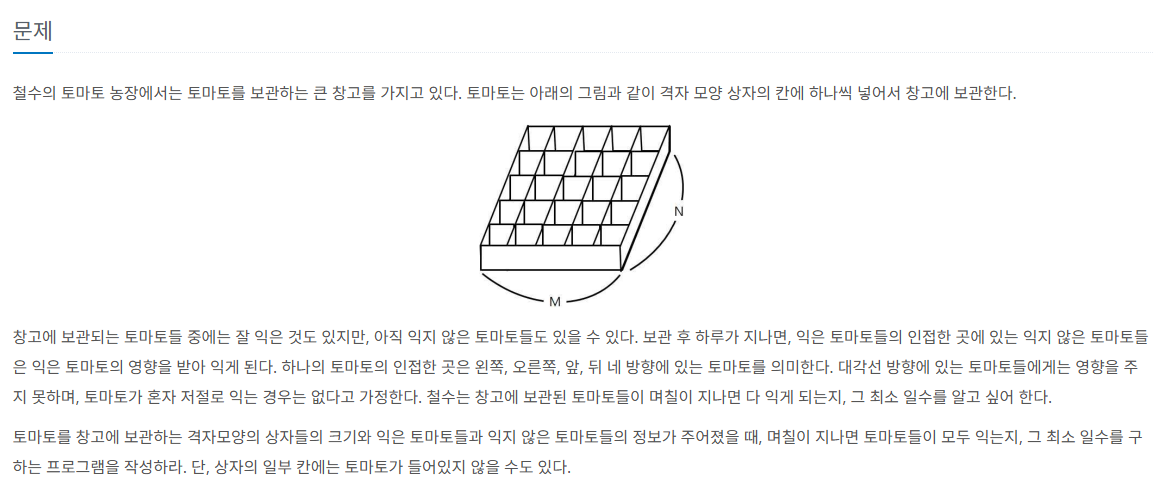

## 입력 출력 및 예제


* 입력

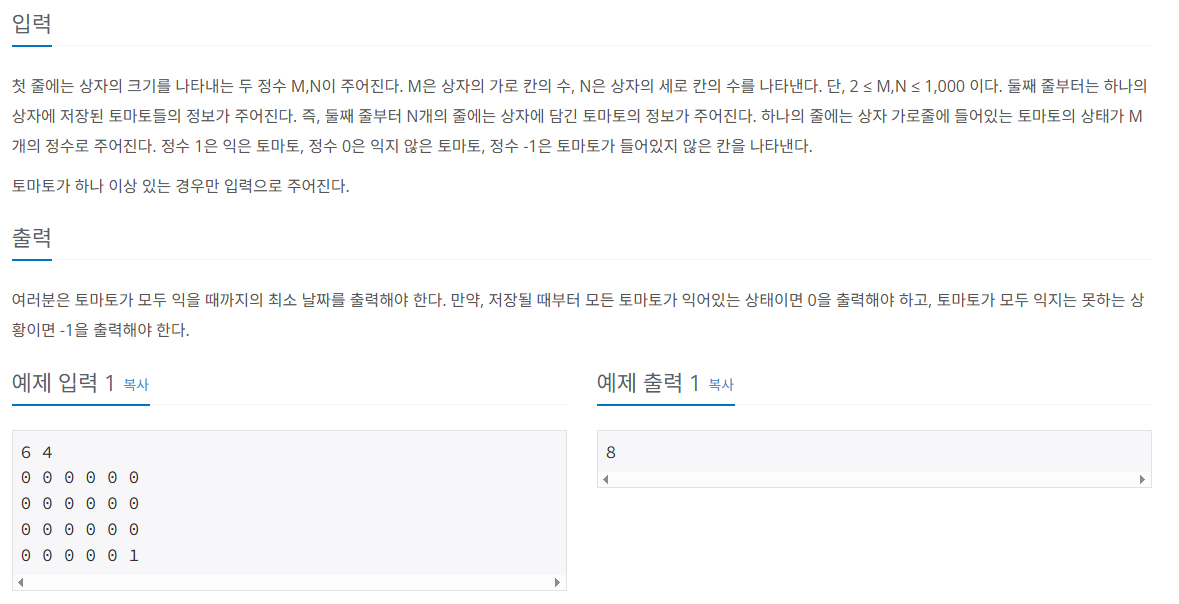

* 출력

* 예제

## 구상

- for문으로 1 인 지점을 찾아서 주변 토마토 처리
    - 순서대로 돌았을 때, 0 이였던 토마토가 1이 되면서, 1이 된 상태로 처리가 되는건 어떡하지 ?
    - temp 배열 만들어서 해보자
- 한번 돌 때 마다 날짜 +1
- 새로 익은 토마토가 있는지, 모든 토마토가 익었는지 체크



## 코드

In [2]:
M, N = map(int, input().split())
arr = []
for _ in range(N):
    arr.append(list(map(int, input().split())))

6 4
0 0 0 0 0 0
0 0 0 0 0 0
0 0 0 0 0 0
0 0 0 0 0 1


In [ ]:
# GPT

import sys
from collections import deque

input = sys.stdin.readline

M, N = map(int, input().split())
graph = [list(map(int, input().split())) for _ in range(N)]

queue = deque()
dirs = [(1,0), (-1,0), (0,1), (0,-1)]

# 1️⃣ 처음부터 익어있는 토마토 전부 큐에 삽입
for i in range(N):
    for j in range(M):
        if graph[i][j] == 1:
            queue.append((i, j))

# 2️⃣ BFS
while queue:
    x, y = queue.popleft()
    for dx, dy in dirs:
        nx, ny = x + dx, y + dy
        if 0 <= nx < N and 0 <= ny < M:
            if graph[nx][ny] == 0:
                graph[nx][ny] = graph[x][y] + 1
                queue.append((nx, ny))

# 3️⃣ 결과 계산
answer = 0
for i in range(N):
    for j in range(M):
        if graph[i][j] == 0:
            print(-1)
            exit()
        answer = max(answer, graph[i][j])

print(answer - 1)


In [4]:
# 시간 초과

M, N = map(int, input().split())
graph = [list(map(int, input().split())) for _ in range(N)]

dirs = [(1,0),(-1,0),(0,1),(0,-1)]
days = 0

while True:
    temp = []
    # 1을 찾아서 주변 0을 익음 후보로 추가
    for i in range(N):
        for j in range(M):
            if graph[i][j] == 1:
                for dx, dy in dirs:
                    nx, ny = i+dx, j+dy
                    if 0 <= nx < N and 0 <= ny < M:
                        if graph[nx][ny] == 0:
                            temp.append((nx, ny))

    # 만약 더 이상 익힐 토마토가 없으면 종료
    if not temp:
        break

    # 새로 익힐 토마토 0 -> 1
    changed = False
    for x, y in temp:
        if graph[x][y] == 0:
            graph[x][y] = 1
            changed = True

    if changed:
        days += 1
    else:
        break

# 다 익었는지 체크
for i in range(N):
    for j in range(M):
        if graph[i][j] == 0:
            print(-1)
            exit()

print(days)

6 4
0 0 0 0 0 0
0 0 0 0 0 0
0 0 0 0 0 0
0 0 0 0 0 1
8


### 메모
-

*